# **CS2302 Data Structures**
**Assignment:** Lab 2 - Binary Search Trees

**Author:** Olac Fuentes

**Last modified:** February 21, 2023


# Submission and Grading Guidelines
**PLEASE READ THIS CAREFULLY!**

* As stated in the syllabus your lab consists of two parts, the source code and the report.
* This Colab notebook contains all the starter code needed for the lab along with some explanations and hints.
* You will submit **both your code and report in this single Colab notebook**, therefore you must extend and modify this notebook to include everything required in the report guidelines in the syllabus.
* Compute the Big-O running times of all your implemented functions and include them in your report.


# **Question 1**




Write the function $quickBST(L)$  that receives a list $L$ and builds and returns a binary search tree with the elements of $L$ without using the insert operation. Your function must work as follows:



```
quickBST(L)
  if L is empty, return an empty BST
  Create a node T containing L[0] as the key
  Let L_left be the list containing the elements of L that are less than L[0]
  Let L_right be the list containing the elements of L that are greater than L[0]
  Let the left child of T be the BST obtained by calling quickBST(L_left)
  Let the right child of T be the BST obtained by calling quickBST(L_right)
  return T
```



In [1]:
import bst
def quickBST(L):
      # if L is empty, return an empty BST
      # Create a node T containing L[0] as the key
      # Let L_left be the list containing the elements of L that are less than L[0]
      # Let L_right be the list containing the elements of L that are greater than L[0]
      # Let the left child of T be the BST obtained by calling quickBST(L_left)
      # Let the right child of T be the BST obtained by calling quickBST(L_right)
      if len(L) == 0:
        return bst.BST()
      
      T = bst.BST(L[0])      
      L_left = [elements for elements in L if elements < L[0]]
      L_right = [elements for elements in L if elements > L[0]]
      T.left = quickBST(L_left)
      T.right = quickBST(L_right)
      return T

# Test Cases
L1 = [3,1,2,0,4,5]
T = quickBST(L1)
T.draw()

L2 = [9,8,3,1,5,0]
T = quickBST(L2)
T.draw()

ModuleNotFoundError: ignored

# **Question 2**

Write the function $isBST(t)$ that receives a binary tree t and determines if t is a binary search tree. For example, your function should return True if it receives the tree on the left and False if it receives the tree on the right (since key 68 is on the left subtree of key 66). Do this by extracting the in-order traversal of the tree to a Python list and checking to see if the list is sorted. Your function must run in time O(n) (no credit will be given if it takes longer than that).

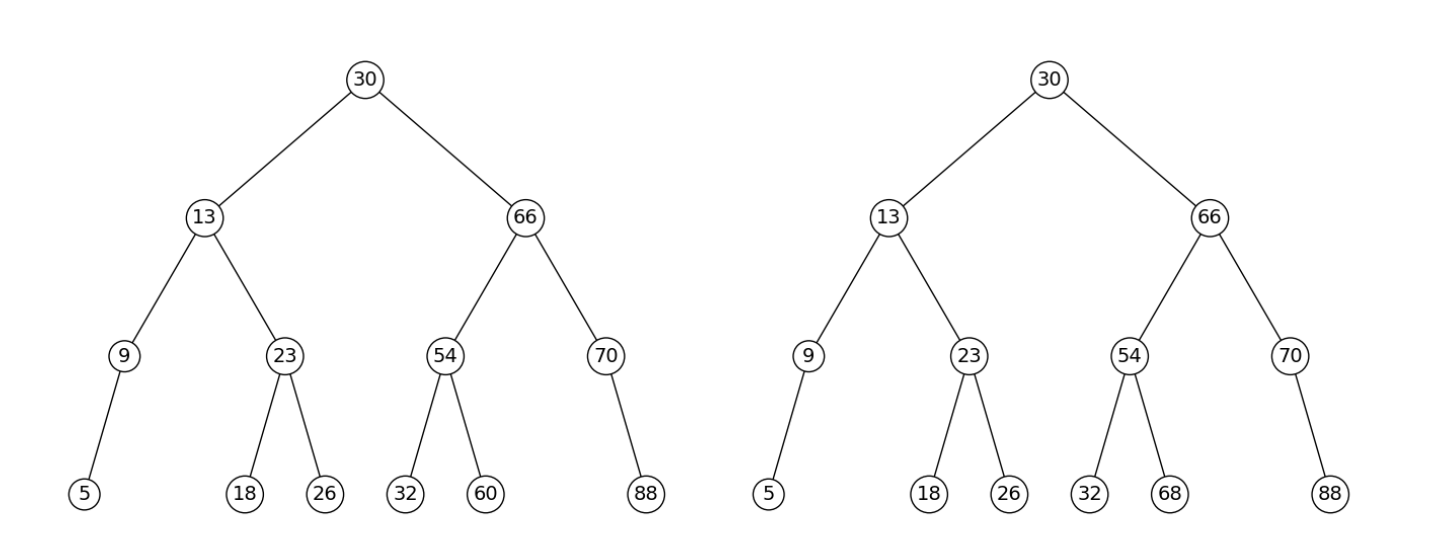

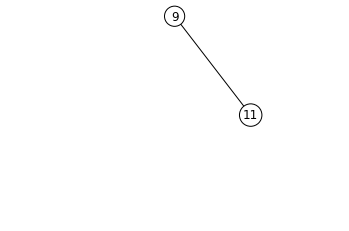

True


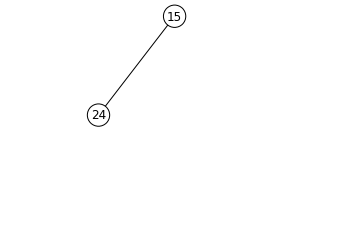

False


In [ ]:
def isBst(t):
    # check if the tree is empty
    if t.is_empty:
        return True
    L = tree_to_list(t) # call to helper method
    for i in range(1, len(L)):
        if L[i] <= L[i-1]: # modified to handle duplicates
            return False
    return True
  
def tree_to_list(t):
    if t.is_empty:
        return []
    return tree_to_list(t.left) + [t.key] + tree_to_list(t.right)

t1 = bst.BST()

for i in [9,11]:
  t1.insert(i)

t1.draw()
print(isBst(t1))

t2= bst.BST(15)
t2.left = bst.BST(24)

t2.draw()
print(isBst(t2))

# **Question 3**

Write the function $ isBST2(t)$that receives a binary tree $t$ and determines if $t$ is a binary search tree. Your function should give the same results as the one in the previous question, but now you are not allowed to use extra storage (that is, you cannot extract the elements of the tree to a list). Your function must run in time $O(n)$ (no credit will be given if it takes longer than that). Hint: use recursion; every recursive call should receive the root and the minimum and maximum key values that the root could have.

For example, the figure below shows in red the minimum and maximum valid values for every key based on its ancestors. If there is a key that is greater than its maximum valid value or smaller than its minimum valid value, then the tree is not a binary search tree. We can see that all keys in the tree are in their valid ranges, thus the tree is a binary search tree. 

Valid values for the root are in the range $[-infinity, infinity]$, since it has no ancestors. Since the value at the root is 26, then its left subtree can only have key values in the $[-infinity, 26]$ range, while the right subtree can only have keys in the $[26, infinity]$ range. 

If we replaced key $16$ by $30$, the tree would no longer be a binary search tree, since $30$ is not in the $[2, 26]$ range. Notice that we define the ranges based only on a node's ancestors. 

Valid values for the root are in the range $[-infinity, infinity]$. Since the value at the root is 26, then the left subtree can only have key values in the $[-infinity, 26]$ range, while the right subtree can only have keys in the $[26, infinity]$ range. 

In general, if the valid key range for a node with key $k$ is $[min_k, max_k]$, the resulting valid ranges for its subtress will be $[min_k, k]$ for the left subtree and $[k, max_k]$  for the right subtree. 

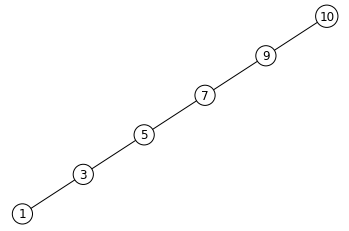

True


In [ ]:
def isBST2(t, maxkey = float('inf'), minkey = float('-inf')):
    # case 1 (empty tree)
    if t.is_empty:
        return True
    # case 2 there is no left child and the left key is greater than the root key
    if (t.key > maxkey):
        return False
    # case 3 there is no right child and the right key is less than the root key
    if (t.key < minkey):
        return False
    # case 4 recursive case 
    return isBST2(t.left, t.key, minkey) and isBST2(t.right, maxkey, t.key)

t1 = bst.BST()
for i in [10,9,7,5,3,1]:
  t1.insert(i)

t1.draw()
print(isBST2(t1))


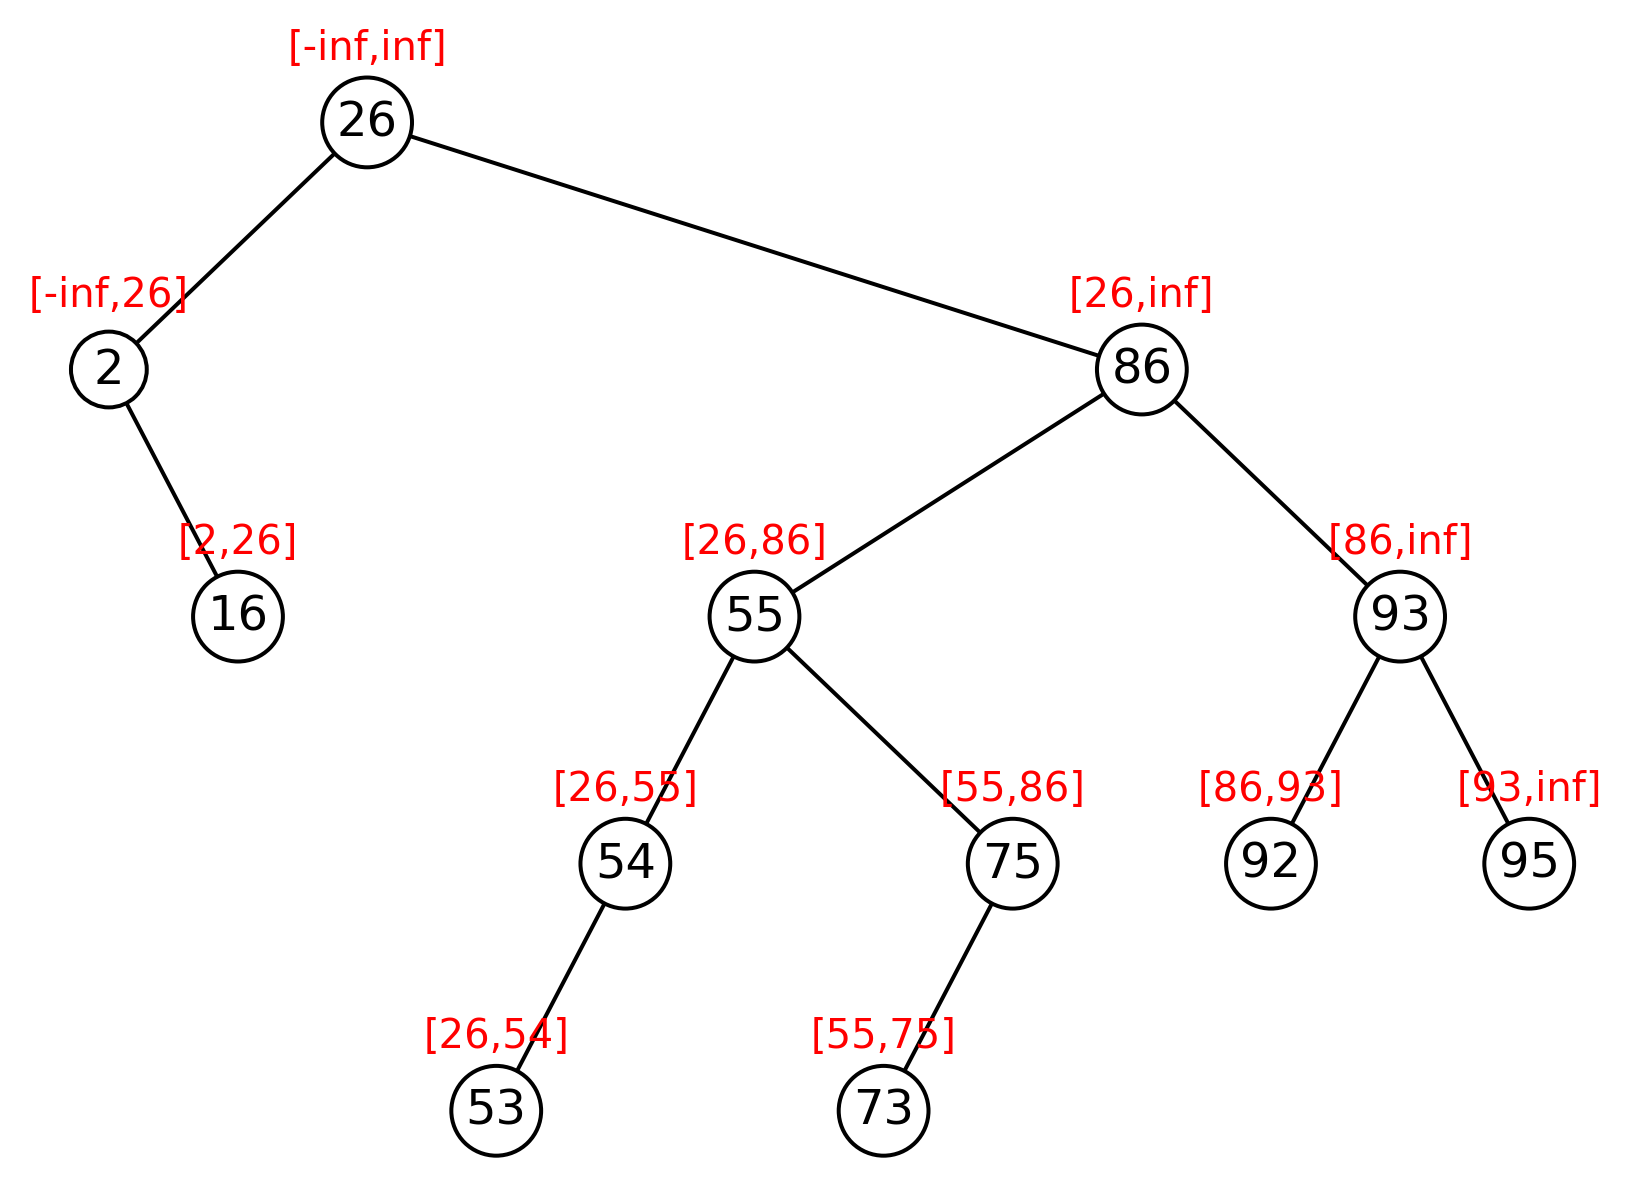

# **Question 4**

Write the function $equalBSTs(t1,t2)$ that receives binary search trees $t1$ and $t2$ and determines if they are identical (that is, they have the same keys and the same shape).

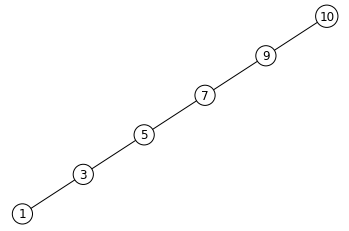

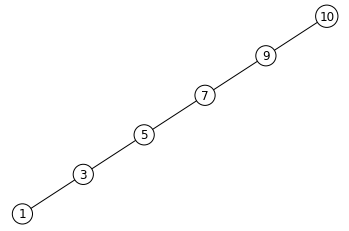

True


In [ ]:
def equalBSTs(t1, t2):
    # base case: both trees are empty
    if t1.is_empty and t2.is_empty:
        return True
    
    # base case: one of the trees is empty, but the other is not
    if t1.is_empty or t2.is_empty:
        return False
    
    # check if the roots of both trees are equal
    if t1.key != t2.key:
        return False
    
    # recursively check if the left and right subtrees are equal
    return (equalBSTs(t1.left, t2.left) and equalBSTs(t1.right, t2.right))

t1 = bst.BST()
t2 = bst.BST()

for i in [10,9,7,5,3,1]:
  t1.insert(i)

for i in [10,9,7,5,3,1]:
  t2.insert(i)

t1.draw()
t2.draw()
print(equalBSTs(t1,t2))


# **Extra credit**

Write the function $mergeBSTs(t1,t2)$ that receives binary search trees $t1$ and $t2$ and determines if they can be merged by adding a reference from a node in $t1$ to the root of $t2$ while maintaining the binary search tree property. If merging the trees is possible, your function should merge them, with the root of the merged tree being $t1$, if that is not possible, the function should do nothing. 

For example, for the trees below, $mergeBSTs(t0,t1)$ should transform $t0$ into  $t3$, since the merge is possible, and $mergeBSTs(t0,t2)$ should leave $t0$ unchanged, since the merge is not possible. 


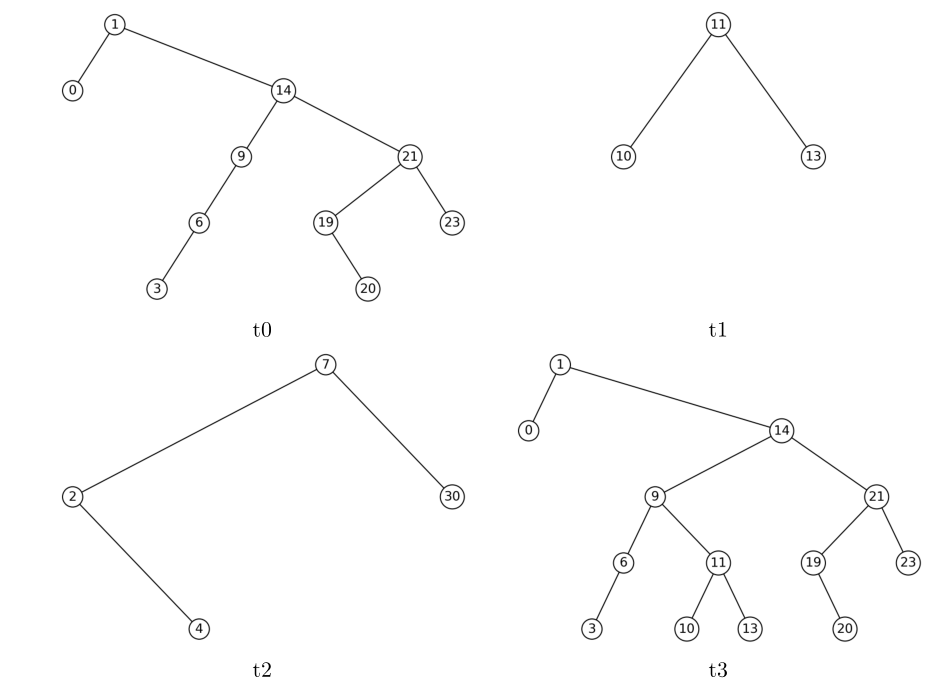

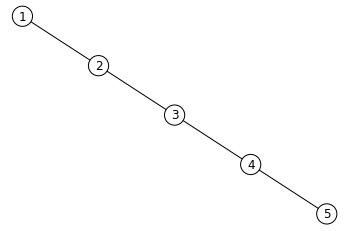

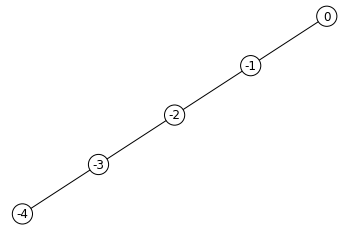

KeyboardInterrupt: ignored

In [ ]:
def mergeBSTs(t1, t2):
    if t1.is_empty or t2.is_empty:
        return None
    
    # find the maximum value in the left subtree of t1
    max = t1.right
    while max:
        max.right = t1.right
    
    # find the minimum value in the right subtree of t2
    while t2.left:
        t2 = t2.left
    
    # check if we can merge the trees
    if t1.key < t2.key:
        # add a reference from a node in t1 to the root of t2
        t1.right = t2
        # update the root of the merged tree to be the root of t1
        return t1
    else:
        return None

t1 = bst.BST()
t2 = bst.BST()

for i in [1,2,3,4,5]:
  t1.insert(i)

for i in [0,-1,-2,-3,-4]:
  t2.insert(i)

t1.draw()
t2.draw()
print(mergeBSTs(t1,t2))